In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('DuoData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store            270 non-null    object
 1   Placement Level  270 non-null    int64 
 2   Actual Sales     270 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.5+ KB


In [69]:
# Checking that each store exists only once
df['Store'].nunique()

270

In [66]:
# Create columns for Gross Profit by multiplying the provided profit margin and the Net Profit by subtracting the placement level cost
profit_margin = .47
df['Gross Profit'] = df['Actual Sales'] * profit_margin
df['Net Profit'] = df['Gross Profit'] - df['Placement Level']

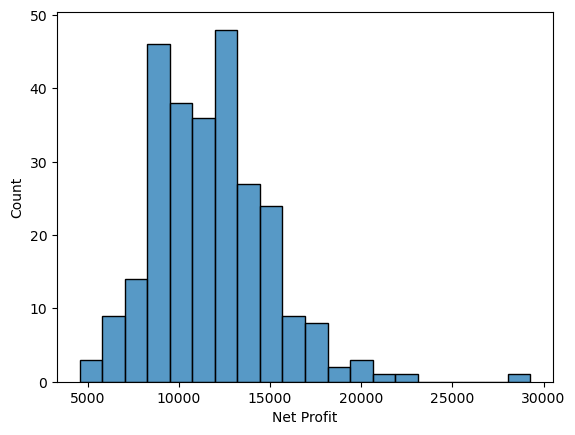

In [67]:
# Histogram of Net Profit is fairly normal if outlier near 30000 is excluded --> can use mean in the aggregation by placement level
# On another note, outlier store could be an interesting case to explore
sns.histplot(data=df,x='Net Profit')
plt.show()

In [68]:
# Aggregating the data to make the placement level the unit of analysis.
df_agg = df.groupby('Placement Level').mean().round(2)
df_agg.head()

,Actual Sales,Gross Profit,Net Profit
Placement Level,,,
0,23405.48,11000.57,11000.57
10000,48445.83,22769.54,12769.54
20000,67640.29,31790.93,11790.93
30000,89571.08,42098.41,12098.41
40000,109699.20,51558.63,11558.63


In [81]:
# The recommended placement level will depend upon the company's operational objectives - if they want to maximize sales or gross profits, then they should invest at the highest placement level. If they want to maximize net profits (which is more likely) then they should place at level 2 (10,000).